<a href="https://colab.research.google.com/github/Dharmik34/2214_2-Big-Data/blob/main/ttc_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
ttc_data = pd.read_csv('ttc-bus-delay-data-2022.csv')

In [ ]:
ttc_data

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,1-Jan-22,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,NaN,8531
1,1-Jan-22,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,W,8658
2,1-Jan-22,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,S,0
3,1-Jan-22,320,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11,S,0
4,1-Jan-22,320,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8,S,0
...,...,...,...,...,...,...,...,...,...,...
27346,30-Jun-22,123,00:45,Thursday,SHERWAY GARDENS RD,Operations - Operator,27,54,E,8088
27347,30-Jun-22,102,01:08,Thursday,WARDEN AND DANFORTH,Operations - Operator,30,60,S,3416
27348,30-Jun-22,66,01:15,Thursday,UNKNOWN,Operations - Operator,30,30,NaN,0
27349,30-Jun-22,32,01:33,Thursday,RENFORTH STATION,Cleaning - Unsanitary,18,36,E,1202


In [ ]:
ttc_data.isnull().sum()

Date            0
Route         164
Time            0
Day             0
Location        0
Incident        0
Min Delay       0
Min Gap         0
Direction    5577
Vehicle         0
dtype: int64

In [ ]:
ttc_data = ttc_data.drop(['Direction'],axis=1)

ttc_data

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Vehicle
0,1-Jan-22,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,8531
1,1-Jan-22,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,8658
2,1-Jan-22,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,0
3,1-Jan-22,320,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11,0
4,1-Jan-22,320,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8,0
...,...,...,...,...,...,...,...,...,...
27346,30-Jun-22,123,00:45,Thursday,SHERWAY GARDENS RD,Operations - Operator,27,54,8088
27347,30-Jun-22,102,01:08,Thursday,WARDEN AND DANFORTH,Operations - Operator,30,60,3416
27348,30-Jun-22,66,01:15,Thursday,UNKNOWN,Operations - Operator,30,30,0
27349,30-Jun-22,32,01:33,Thursday,RENFORTH STATION,Cleaning - Unsanitary,18,36,1202


In [ ]:
ttc_data['Route'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
27346    False
27347    False
27348    False
27349    False
27350    False
Name: Route, Length: 27351, dtype: bool

In [ ]:
ttc_data.isnull().sum()

Date          0
Route        26
Time          0
Day           0
Location      0
Incident      0
Min Delay     0
Min Gap       0
Vehicle       0
dtype: int64

In [ ]:
ttc_data['Min Delay'].unique()

array([131,  17,   4,  30,  15,  16,  10,  33,   3,  11,  38,  23,  20,
         8, 106,  27,   9,   7,  12,  24,   6,  22,  18,  25,  13,  26,
        36,  29,  28,  80,  19,  50,  78,  60, 140, 200,  21,  14,  35,
       155,  72,   5,  79,  32, 227,  34, 103, 526,  46, 136,   2, 132,
        42,  83, 150,  44, 269, 102,   1, 280,  96,  88, 205, 368, 120,
       127,  41, 151, 278, 291,  49, 130,  61, 249, 288, 290,  68, 284,
        57, 175, 270,  43, 318,  40,  37,  74,  53,  39,  92, 247,  48,
       159,  70,  51, 125,  94,  64, 337, 161,  52,  58,  31, 108,  47,
        45, 119,  67, 114, 602, 107, 117, 361, 360, 600, 999, 336, 323,
       121,  91, 113, 157,  55, 115, 708, 502, 116, 215, 259, 411, 226,
        85,  84, 162, 160, 223, 656, 110, 294, 881, 672, 560, 403,  76,
       128, 611, 181,  63, 625, 437, 471, 325, 183,  66, 124, 267,  93,
       244, 112, 530,  86, 167,  98,  71, 720, 145, 105,  73, 275, 758,
       139, 659, 149,  59, 807, 900, 283, 171, 189, 780,  90, 34

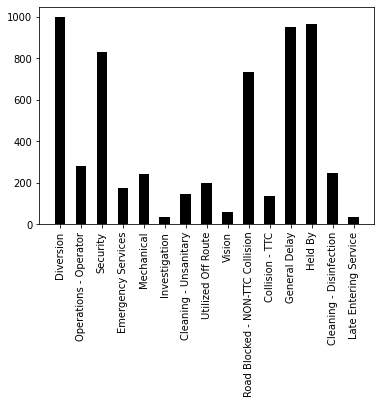

In [ ]:

import matplotlib.pyplot as plt
plt.bar(ttc_data['Incident'],ttc_data['Min Delay'],color='Black',width = 0.5)
plt.xticks(rotation=90)
plt.show()

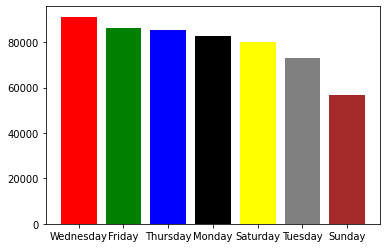

In [ ]:
diff_colors=['red','green','blue','black','yellow','grey','brown']
day = ttc_data.groupby(ttc_data['Day'])['Min Delay'].sum().reset_index()
day_ordered = day.sort_values(by='Min Delay',ascending=False)
day_ordered
plt.bar('Day','Min Delay',data=day_ordered,color=diff_colors)
plt.show()

<ipython-input-13-58908ea386b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttc_data['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time
<ipython-input-13-58908ea386b1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttc_data['Part of Day'] = ttc_data['Time'].apply(lambda x: 'Day' if pd.to_datetime(x,format='%H:%M:%S') >= pd.to_datetime('05:00:00',format='%H:%M:%S') and pd.to_datetime(x,format='%H:%M:%S') <= pd.to_datetime('10:00:00',format='%H:%M:%S') else ('Evening' if pd.to_datetime(x,form

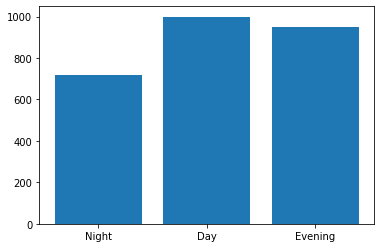

In [ ]:
pd.set_option('display.max_rows', None)
df = pd.DataFrame(data=ttc_data, columns=['Time'])
ttc_data['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time
ttc_data['Time']
ttc_data['Part of Day'] = ttc_data['Time'].apply(lambda x: 'Day' if pd.to_datetime(x,format='%H:%M:%S') >= pd.to_datetime('05:00:00',format='%H:%M:%S') and pd.to_datetime(x,format='%H:%M:%S') <= pd.to_datetime('10:00:00',format='%H:%M:%S') else ('Evening' if pd.to_datetime(x,format='%H:%M:%S') > pd.to_datetime('05:00:00',format='%H:%M:%S') and pd.to_datetime(x,format='%H:%M:%S') < pd.to_datetime('22:00:00',format='%H:%M:%S') else 'Night'))

plt.bar('Part of Day','Min Delay',data=ttc_data)
plt.show()

In [ ]:
ttc_data['Route'].unique()

array(['325', '320', '363', '300', '47', '45', '32', '39', '53', '29',
       '334', '25', '7', '36', '96', '162', '35', '74', '52', '14', '95',
       '79', '85', '20', '41', '46', '960', '42', '116', '43', '129',
       '54', '89', '11', '102', '70', '124', '24', '88', '935', '127',
       '37', '60', '17', '34', '72', '91', '75', '86', '19', '97', '40',
       '78', '62', '189', '121', '100', '94', '134', '22', '84', '165',
       '501', '131', '900', '123', '38', '76', '110', '112', '66', '108',
       '69', '61', '87', '73', '68', '63', '26', '71', '504', '161', '57',
       '21', '105', '130', '118', '67', '44', '90', '106', '56', '307',
       '168', '15', '937', '171', '952', '989', '119', '902', '953',
       '925', '944', '941', '125', '50', '984', '939', '16', '996', '13',
       '80', '81', '927', '905', '133', '160', '107', '109', '111', '98',
       '122', '924', '48', '995', '23', '99', '65', '985', '135', '126',
       '986', '506', '929', '77', '353', '352', '354', '94

<BarContainer object of 10 artists>

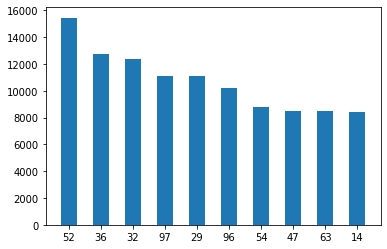

In [ ]:
ttc_route_delay = ttc_data.groupby(by='Route')['Min Delay'].sum().reset_index().sort_values(by="Min Delay",ascending=False).head(10)
plt.bar('Route','Min Delay',data=ttc_route_delay,width=0.5)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

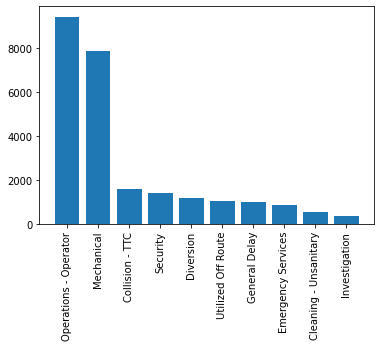

In [ ]:
ttc_route_incident = ttc_data.groupby(by='Incident')['Route'].count().reset_index().sort_values(by='Route',ascending=False).head(10)
plt.bar('Incident','Route',data=ttc_route_incident)
plt.xticks(rotation=90)

In [ ]:
ttc_data['Month'] = pd.to_datetime(ttc_data['Date'],format='%d-%b-%y').dt.strftime('%b')

<ipython-input-26-6ee96284c99d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttc_data['Month'] = pd.to_datetime(ttc_data['Date'],format='%d-%b-%y').dt.strftime('%b')


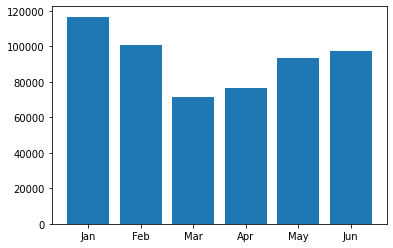

In [ ]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month = ttc_data.groupby('Month')['Min Delay'].sum().reset_index()
month['Month'] = pd.Categorical(month['Month'],categories=months)
month_sorted = month.sort_values(by='Month')
plt.bar(month_sorted['Month'],month_sorted['Min Delay'])
plt.show()

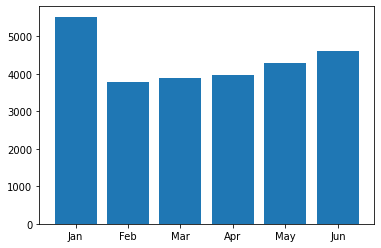

In [ ]:
months = ["Jan","Feb","Mar","Apr","May","Jun","July","Aug","Sep","Oct","Nov","Dec"]
monthwise_incident = ttc_data.groupby('Month')['Incident'].count().reset_index()
monthwise_incident['Month'] = pd.Categorical(month_incident['Month'],categories=months)
month_sorted = monthwise_incident.sort_values('Month')
plt.bar('Month','Incident',data=month_sorted)
plt.show()

In [ ]:
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]


In [ ]:
monthwise_incident['Incident_count'] = ttc_data.groupby(['Month','Incident'])['Incident'].agg('count')
monthwise_incident


Month           Incident                        
Apr             Cleaning - Disinfection                1
                Cleaning - Unsanitary                103
                Collision - TTC                      225
                Diversion                            137
                Emergency Services                   158
                General Delay                        145
                Held By                               10
                Investigation                         42
                Late Entering Service                  3
                Mechanical                          1098
                Operations - Operator               1559
                Road Blocked - NON-TTC Collision      84
                Security                             246
                Utilized Off Route                   107
                Vision                                44
Feb             Cleaning - Disinfection                1
                Cleaning - Unsanitary  